<a href="https://colab.research.google.com/github/jhashivam0022/STP_AIML_IIITH_Projects_and_Labs/blob/main/AIML_Module_4_Lab_1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

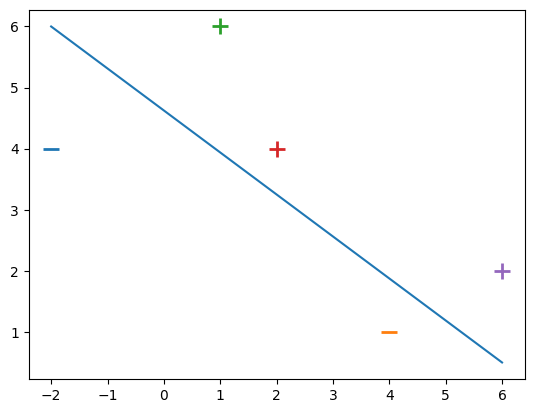

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

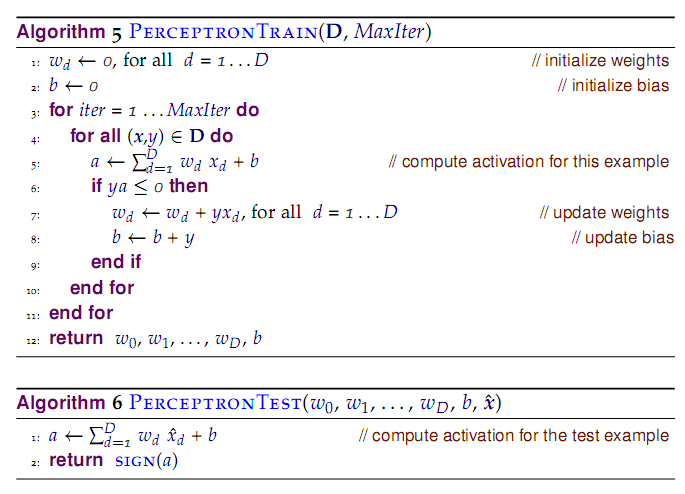

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

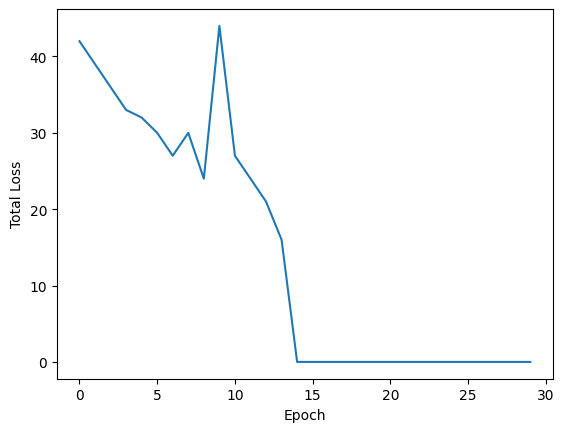

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

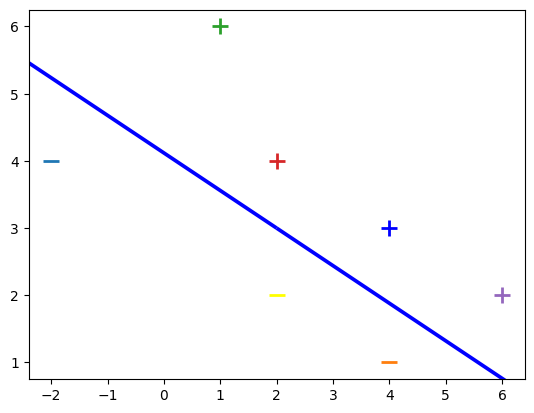

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [11]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


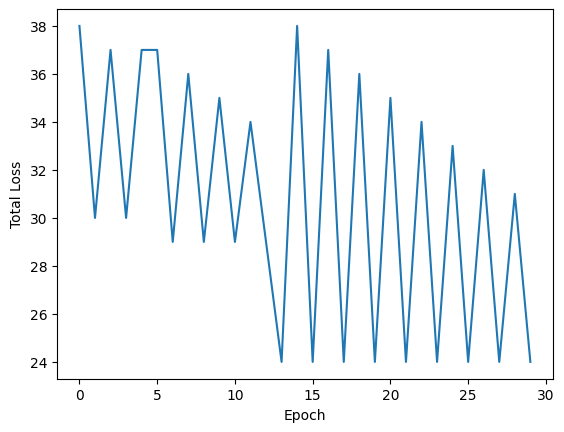

In [12]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

1. Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.


In [15]:
import pandas as pd
df=pd.read_csv("/content/sample_data/Sonar.csv")

In [30]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [18]:
np.random.seed(42)
predictions = np.random.rand(len(y))

In [20]:
errors = np.abs(predictions - y)

In [23]:
import seaborn as sns


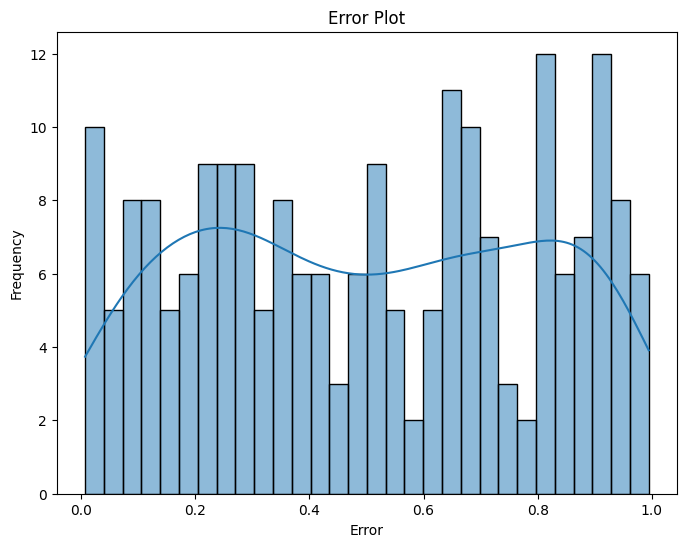

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, bins=30)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Plot')
plt.show()

2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

Increasing the Learning Rate:

Initially might lead to faster convergence.
Can result in overshooting the optimal solution, causing oscillations or divergence.
Might require fewer iterations to reach divergence if the rate is excessively large.

Decreasing the Learning Rate:

Often results in slower convergence.
Reduces the likelihood of overshooting the optimal solution.
Requires more iterations but generally leads to stability.

Convergence with a Huge Learning Rate:


A very large learning rate can cause divergence.
The model's parameter updates might be so significant that it overshoots the optimal solution and fails to converge.

code-

Learning Rate: 0.01, Theta: [3.53074658 3.34816891]


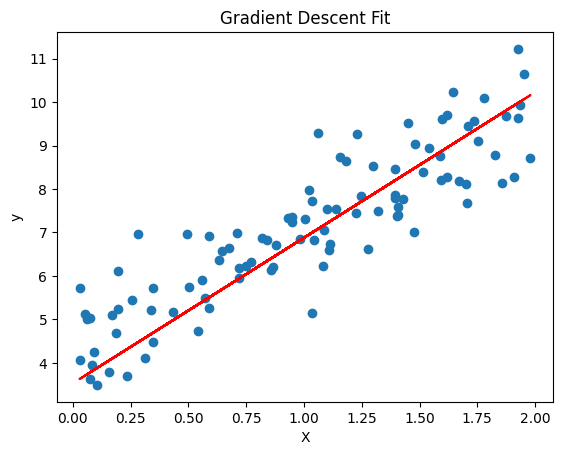

Learning Rate: 0.1, Theta: [4.3399227  2.73613256]


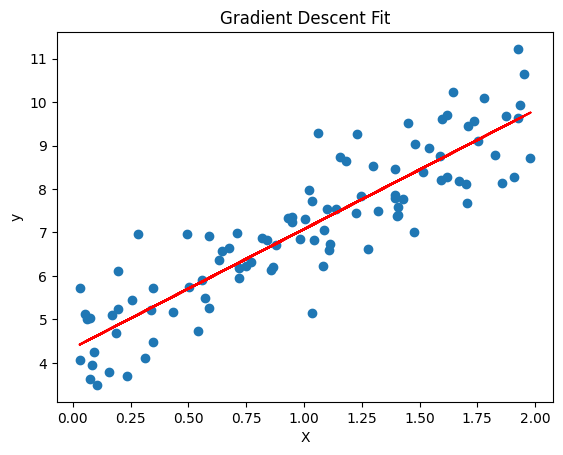

Learning Rate: 0.5, Theta: [-1.36382426e+08 -1.61858354e+08]


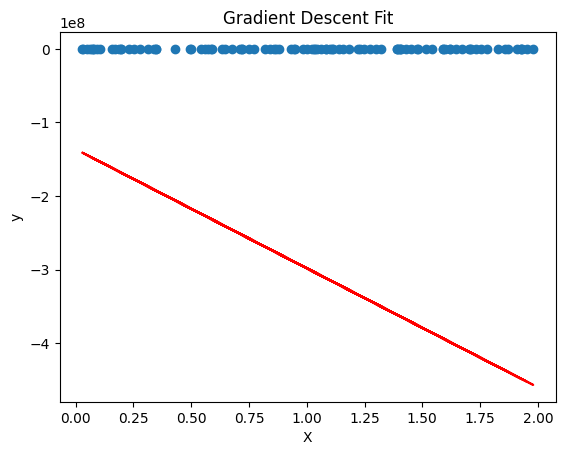

Learning Rate: 1.0, Theta: [-1.95946868e+53 -2.32549296e+53]


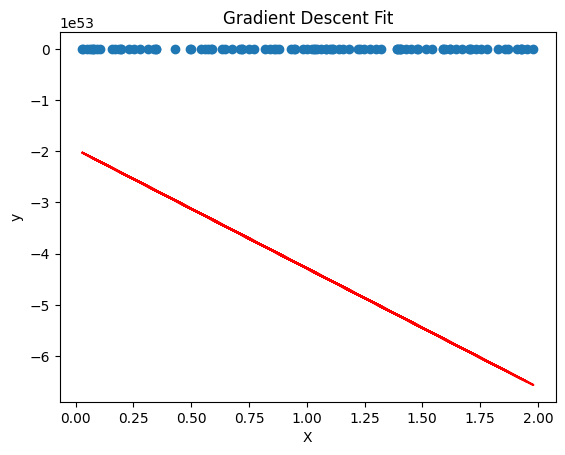

Learning Rate: 1.5, Theta: [-1.20824175e+75 -1.43393855e+75]


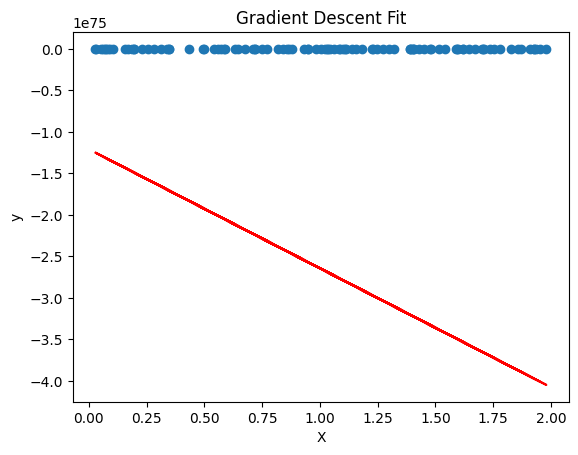

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Gradient Descent function
def gradient_descent(X, y, learning_rate, n_iterations):
    m = len(y)
    theta = np.random.randn(2,1)
    X_b = np.c_[np.ones((m, 1)), X]
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= learning_rate * gradients
    return theta

# Function to plot the model predictions
def plot_gradient_descent(X, y, theta):
    plt.scatter(X, y)
    plt.plot(X, X*theta[1] + theta[0], 'r')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Gradient Descent Fit')
    plt.show()

learning_rates = [0.01, 0.1, 0.5, 1.0, 1.5]  # Different learning rates to test

for rate in learning_rates:
    theta = gradient_descent(X, y, learning_rate=rate, n_iterations=100)
    print(f"Learning Rate: {rate}, Theta: {theta.flatten()}")
    plot_gradient_descent(X, y, theta)


3. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.

In [75]:
A = np.array([
    [1, -1,0],
    [5, -2.5,0],
    [-7.5, 7.5,0],
    [10, 7.5,1],
    [2.5, 12.5,0],
    [5,10,1],
    [5,5,1]
])

In [76]:
B = np.array([0,0,0,1,0,1,1])

[10.   7.5  1. ]


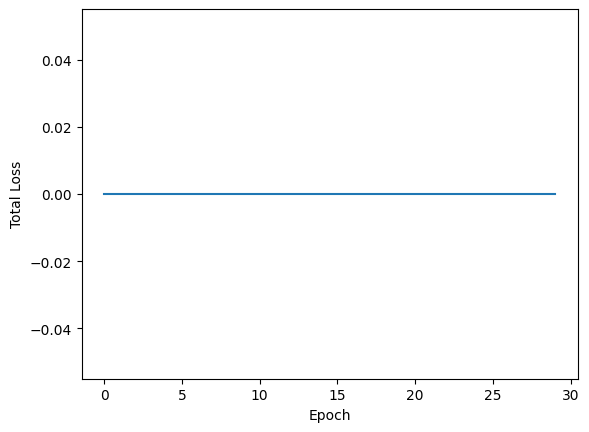

In [77]:
print(perceptron_algo_plot(A, B))

In [79]:
print(perceptron_algo(A, B))

[10.   7.5  1. ]


Observations:

The algorithm fails to find a decision boundary that separates the classes.

The perceptron algorithm might still adjust its weights to minimize errors, but it won't achieve perfect separation due to the non-linear nature of the data distribution.

The perceptron algorithm can't achieve perfect classification.
